In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_data_completeness(original_path, filled_path):
    """
    Create a top-to-bottom plot comparing data completeness before and after imputation.
    
    Parameters:
    -----------
    original_path : str
        Path to the original CSV file
    filled_path : str
        Path to the filled/augmented CSV file
    """
    # Read the CSV files
    df_original = pd.read_csv(original_path)
    df_filled = pd.read_csv(filled_path)
    
    # Set up the figure with 2 rows and 1 column
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4, 6))  # 2 rows, 1 column
    
    # Determine which points have complete data
    original_complete = ~df_original.isna().any(axis=1)
    filled_complete = ~df_filled.isna().any(axis=1)
    
    # Plot before imputation
    ax1.scatter(df_original.loc[original_complete, 'LON'], 
               df_original.loc[original_complete, 'LAT'],
               c='green', label='Complete', alpha=0.6)
    ax1.scatter(df_original.loc[~original_complete, 'LON'],
               df_original.loc[~original_complete, 'LAT'],
               c='red', label='Incomplete', alpha=0.6)
    ax1.set_title('Before Imputation')
    ax1.set_xlabel('Longitude')
    ax1.set_ylabel('Latitude')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot after imputation
    ax2.scatter(df_filled.loc[filled_complete, 'LON'],
               df_filled.loc[filled_complete, 'LAT'],
               c='green', label='Complete', alpha=0.6)
    ax2.scatter(df_filled.loc[~filled_complete, 'LON'],
               df_filled.loc[~filled_complete, 'LAT'],
               c='red', label='Incomplete', alpha=0.6)
    ax2.set_title('After Imputation')
    ax2.set_xlabel('Longitude')
    ax2.set_ylabel('Latitude')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Add overall title
    fig.suptitle('Data Completeness Comparison', fontsize=14, y=1.05)
    
    # Adjust layout
    plt.tight_layout()
    
    # Add completion statistics as text
    stats_text = (f'Before: {sum(original_complete)}/{len(df_original)} complete points '
                 f'({100*sum(original_complete)/len(df_original):.1f}%)\n'
                 f'After: {sum(filled_complete)}/{len(df_filled)} complete points '
                 f'({100*sum(filled_complete)/len(df_filled):.1f}%)')
    fig.text(0.5, -0.05, stats_text, ha='center', fontsize=10)
    
    plt.show()
    
    return fig


In [3]:
original_file = '../output/FINAL_SOTWIS_NASA.csv'
augumented_file = '../output/AUGUMENTED_SOTWIS_NASA.csv'

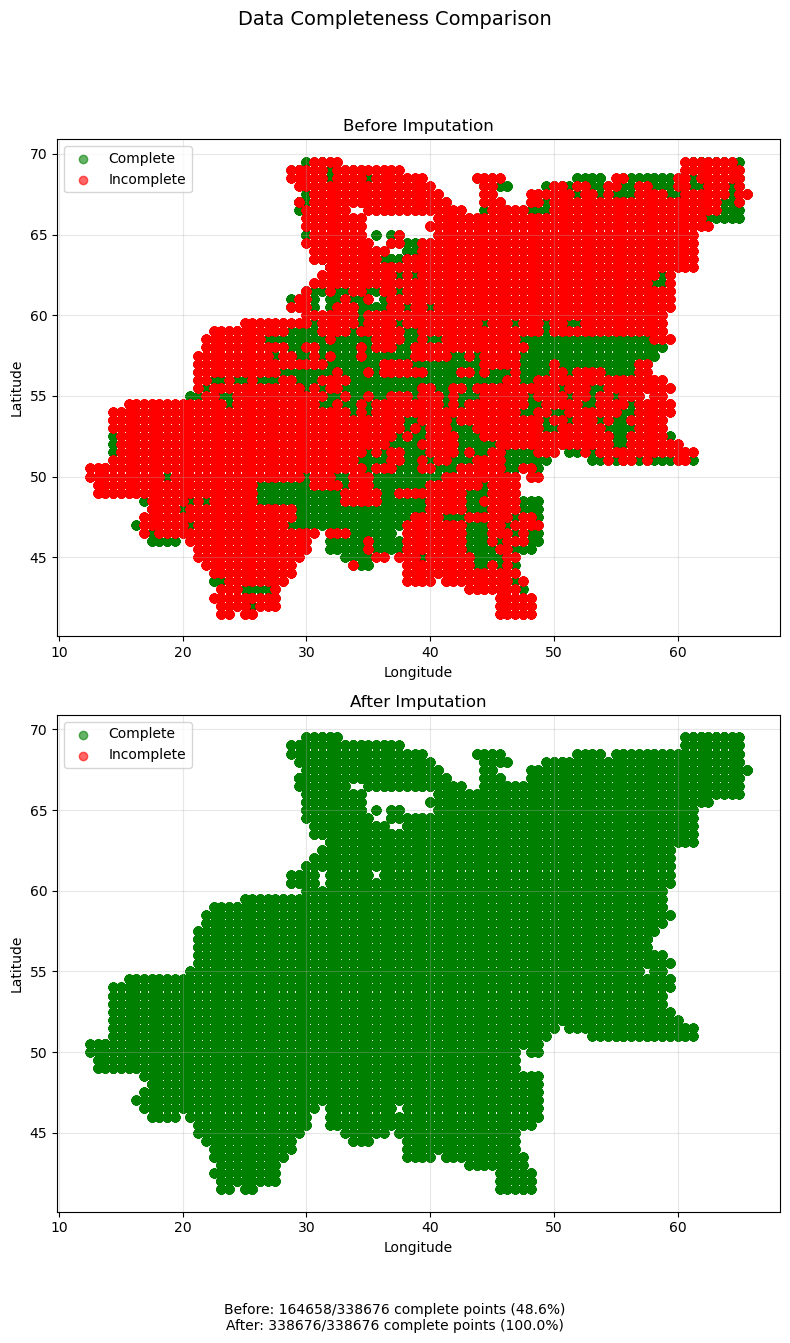

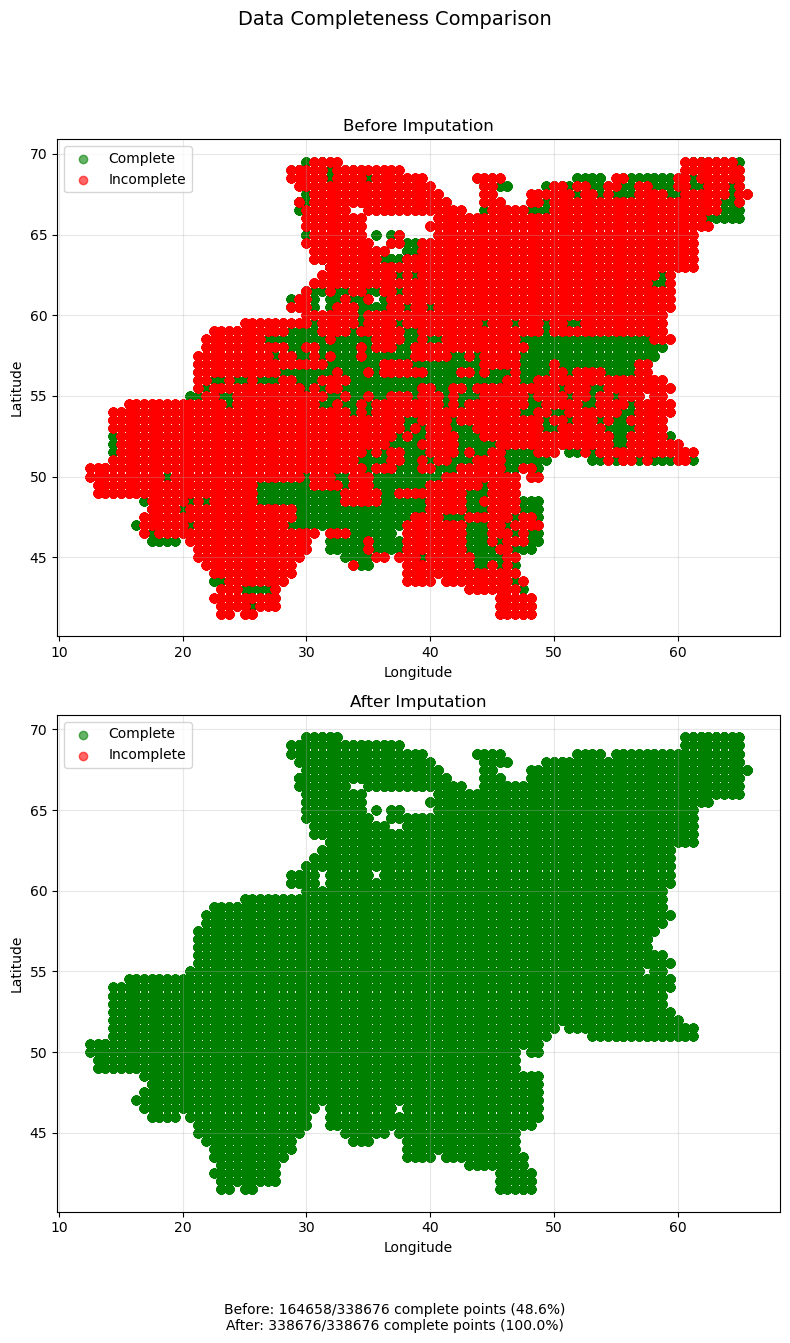

In [4]:
plot_data_completeness(original_file, augumented_file)